<a href="https://colab.research.google.com/github/sanha-hwang/Stroke-prediction/blob/main/Project2_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

안녕하세요 **뽀글머리 산하**입니다. 

이번 프로젝트는 지난 section2에서 배운 내용을 토대로 머신러닝을 이용해 데이터를 분석하고 시각화하는 과정을 다뤄보겠습니다. 

먼저, 데이터 셋은 kaggle 사이트에서 다운받은 Stroke Prediction Dataset입니다.
아무래도 헬스케어와 의료서비스에 관심이 많은 저에게는 프로젝트하나하나 할 때 의료지식까지 함께 공부하면 좋을 것 같아서 준비해보았습니다.

이번 데이터를 통해 제가 할 일은 약 5000명정도 환자들의 건강데이터를 가지고 뇌졸증에 걸릴 가능성을 예측하는 것입니다. 특히 가장 영향을 주는 특성이 무엇인지 뽑아 보겠습니다.


*   <strong>최종 목표: 어떤 특성이 뇌졸증 발현에 어느정도로 영향을 주는가</strong>



## <strong>1. 데이터이해하기</strong>

먼저 데이터분석에 앞서 제가 가진 데이터에 대해서 이해해보겠습니다.

**뇌졸증(stroke)**이란 뇌의 혈액의 공급이 갑자기 차단되거나 뇌의 혈관이 터질 때 뇌세포르 감싸는 공간에 피가 누설되면서 발생하는 뇌혈관질환이다. 뇌는 우리 몸 전체에서 무게로는 체중의 2%밖에 되지만 심박출량(심장이 뿜어내는 혈류량)의 15%를 소비하고, 산소 소모량 또한 20%나 된다. 그만큼 뇌에게는 혈액과 산소가 공급되지 않으면 크나큰 재앙을 불러온다. 

세계 보건기구(WHO)에 따르면 뇌졸증은 전 세계적으로 두 번째 주요 사망원인으로 전체 사망의 11%를 차지합니다.

또한 치료에 많은 비용과 시간이 들어가며, 치료를 하더라도 뇌손상에 의한 여러가지 장애를 남기기 쉬운 질환이고, 치료 후에도 상당수가 재발한다.

데이터 셋의 구성을 살펴보면

id: 고유식별자

gender: 성별

age: 환자의 나이

hypertension: 고혈압의 여부, 0-> no, 1-> yes

heart_disease: 심장병의 여부, 0->no, 1->yes

ever_married: 결혼 경험여부, True/ False

work_type: 직업 타입 (private가 많음)

Residence_type: 주거타입, Urban, Rural

avg_glucose_level: 포도당 수치

bmi: bmi수치

smoking_status: 흡연여부 (과거이력까지)

특성으로 의학적인 수치(고혈압 여부, 심장병 여부, 포도당 수치, bmi수치)도 확인할 수 있지만, 환자를 둘러싸고 있는 환경(성별, 나이, 결혼경험, 직업종류,주거타입, 흡연여부)을 다룬 특성도 다수 있는 것을 볼 수가 있다.

따라서 세부적인 의학적인 수치로 뇌졸증을 판단하기 보다는 환자가 처해있는 환경에 따라 뇌졸증에 걸릴 위험이 높아질 수 있다 정도를 판단해 볼 수 있을 것같다.

#<strong>2.데이터 전처리하기</strong>


###2.1 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#항상 먼저할 업데이트
!pip install -U pandas-profiling
!pip install --upgrade category_encoders
!pip install -U scikit-learn
!pip install -U imbalanced-learn
!pip install -U pdpbox
!pip install -U shap
!pip install -U eli5

In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#processing
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

#모델
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#모델제작
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline

#모델평가
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score,recall_score, roc_auc_score
#평가 지표
def score(y_val,pred):
  accuracy = accuracy_score(y_val,pred)
  precision = precision_score(y_val,pred)
  recall = recall_score(y_val,pred)
  f1 = f1_score(y_val,pred)
  roc_score = roc_auc_score(y_val,pred,average='macro')
  print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy,precision,recall))
  print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1,roc_score,recall))

#특성 중요도
import eli5
from eli5.sklearn import PermutationImportance

In [4]:
import pandas as pd
import pandas_profiling
stroke_data=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


구글 드라이브에 업로드한 자료 불러오기 성공

###2.2 데이터 결측치 여부, 중복 여부 확인하기

In [ ]:
pr=stroke_data.profile_report()
pr

In [ ]:
stroke_data.isnull().sum() # bmi수치 결측치 존재

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
stroke_data.duplicated().sum() # 중복 없고

0

###2.3 이상치 여부 및 각 특성이 갖는 도메인값 확인

In [ ]:
print(stroke_data['gender'].unique())
stroke_data['gender'].value_counts()

['Male' 'Female' 'Other']


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

82.0 0.08


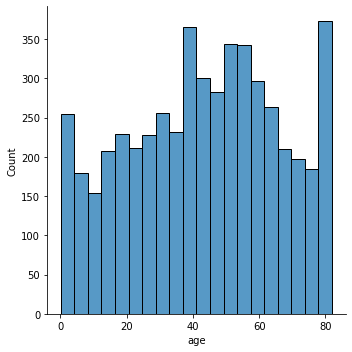

In [ ]:
print(max(stroke_data['age']),min(stroke_data['age'])) 
sns.displot(stroke_data['age']) 

In [ ]:
print('고혈압 여부:',stroke_data['hypertension'].unique())
pd.crosstab(stroke_data['hypertension'],stroke_data['stroke'])

고혈압 여부: [0 1]


stroke,0,1
hypertension,,
0,4429,183
1,432,66


In [ ]:
print('심장병 여부:',stroke_data['heart_disease'].unique())
pd.crosstab(stroke_data['heart_disease'],stroke_data['stroke'])

심장병 여부: [1 0]


stroke,0,1
heart_disease,,
0,4632,202
1,229,47


In [ ]:
print('결혼경험:', stroke_data['ever_married'].unique())
pd.crosstab(stroke_data['ever_married'],stroke_data['stroke'])

결혼경험: ['Yes' 'No']


stroke,0,1
ever_married,,
No,1728,29
Yes,3133,220


In [ ]:
print('직장종류:',stroke_data['work_type'].unique())
pd.crosstab(stroke_data['work_type'],stroke_data['stroke'])

직장종류: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


In [ ]:
print('사는지역:',stroke_data['Residence_type'].unique())
pd.crosstab(stroke_data['Residence_type'],stroke_data['stroke'])

사는지역: ['Urban' 'Rural']


stroke,0,1
Residence_type,,
Rural,2400,114
Urban,2461,135


271.74 55.12


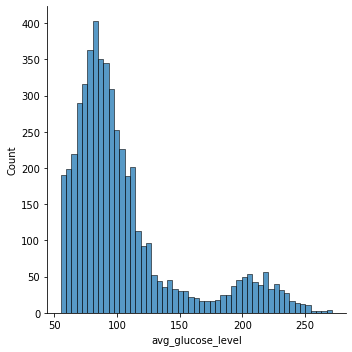

In [ ]:
print(max(stroke_data['avg_glucose_level']),min(stroke_data['avg_glucose_level'])) # ->식후 혈당수치가 200이상이 되면 당뇨병 의심, 건강적신호, but 가능한 수치임
sns.displot(stroke_data['avg_glucose_level']) # 정상인의 혈당은 공복의 경우 60~120㎎/㎗, 식사 2시간 후의 혈당은 140㎎/㎗ 이하로 유지됩니다)

In [ ]:
glu_condition=(stroke_data['avg_glucose_level'] > 160) #->혈당이 높다해서 뇌졸증이 오는 것은 아님
print(stroke_data[glu_condition]['stroke'].value_counts())

0    579
1     89
Name: stroke, dtype: int64


97.6 10.3


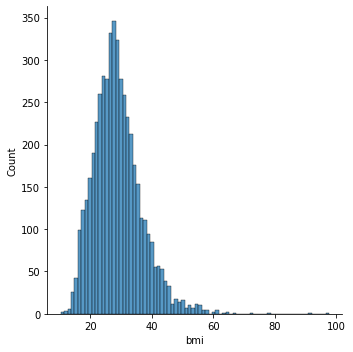

In [ ]:
print(max(stroke_data['bmi']),min(stroke_data['bmi'])) # -> 초고도비만이면 97도 나올수 있음, 미국에서 500키로 나가는 남성 존재..
sns.displot(stroke_data['bmi'])

In [ ]:
bmi_condition= (stroke_data['bmi'] >40)    # -> bmi가 높고 뚱뚱하다해서 꼭 뇌졸증이 오는 것은 아님
stroke_data[bmi_condition]['stroke'].value_counts()  

0    390
1     18
Name: stroke, dtype: int64

In [ ]:
print('흡연여부:',stroke_data['smoking_status'].unique())
pd.crosstab(stroke_data['smoking_status'],stroke_data['stroke'])

흡연여부: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


In [5]:
stroke_data['stroke'].value_counts() #-> 몹시 언밸런스한 데이터 minor값을 oversmapling할 필요가 있음

0    4861
1     249
Name: stroke, dtype: int64

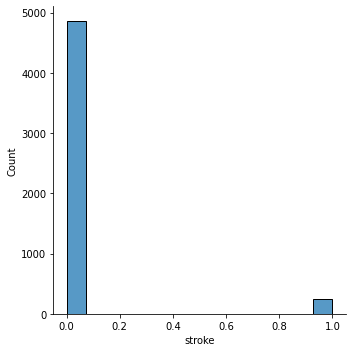

In [9]:
sns.displot(stroke_data['stroke'])

이상치는 없음, 꽤나 정제된 데이터 , 정보 누수도 없다. stroke 특성에 대한 파생변수가 존재하지 않기 때문이다.

생각보다 특성별로 stroke 발현율이 눈에 띄게 보이지 않아 정확한 분류가 힘들 것 같다. 하지만 지극히 제한적인 정보로 병을 찾아내기 위해 효과과 있을 듯 싶다.




###2.4 feature engineering

In [10]:
#feature engineering
#결측치를 가진 bmi 삭제,  대체하는 방법도 있지만 bmi수치가 영향을 줄 수도 있어 잘못학습되는 것을 방지
#dropna 함수에서 default 값으로 axis=0, how='any'이다. any면 행중에 하나라도 결측치가 있다면 제거, all이면 그 행에 모든 특성이 결측치일때 제거
stroke_data.dropna(inplace=True) 
stroke_data.reset_index(drop=True,inplace=True)

#id 특성은 예측하는데 도움되지 않으니 삭제
stroke_data.drop(columns='id',inplace=True)
#성별이 Other인 관측치 1개 삭제 -> 의학적으로 판단하기 위해서는 생물학적 성별이 필요, 사회적 성별인 gender의 other은 필요없다고 판단
rm = stroke_data[stroke_data['gender'] == 'Other' ].index
stroke_data.drop(rm, inplace=True)

#apply와 lamda  함수 이용하기
# stroke_data['gender']=stroke_data['gender'].apply(lambda val:1 if val =='Male' else 0)
# stroke_data['ever_married']=stroke_data['ever_married'].apply(lambda val:1 if val =='Yes' else 0)
# stroke_data['Residence_type']=stroke_data['Residence_type'].apply(lambda val:1 if val =='Urban' else 0)

###2.5 인코더 선택

내가 가진 데이터가 숫자형 데이터도 있지만, 카테고리형 데이터를 많이 포함하고 있다. sklearn을 수행하기 위해서는 모두 숫자로 된 데이터들을 필요로 하기 때문에 인코딩을 해주어야 한다.

카테고리형 변수들을 어떻게 인코딩을 할까

#####<strong>-순서형 인코딩(Ordinal encoding)</strong>
  

*   문자열(범주형) 값을 내림차순 정렬 후 0 부터 1씩 증가하는 값으로 변환

*   숫자의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에 적용한다.

*   숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에는 사용하면 안된다.

#####<strong>-원핫 인코딩(One-Hot encoding)</strong>


*   N개의 클래스를 N 차원의 One-Hot 벡터로 표현되도록 변환
고유값들을 피처로 만들고 정답에 해당하는 열은 1로 나머진 0으로 표시한다.

*   숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에서 범주형 데이터 변환시 라벨 인코딩 보다 원핫 인코딩을 사용한다.


#<strong>3. 학습 모델링</strong>

###3.1 타켓선정 및 데이터셋분리 그리고 베이스라인모델

target 선정이유: 각 특성에 따른 뇌졸증 발생에 영향을 미치는 특성을 찾기 위함이다

해당 베이스라인 모델은 validation set의 target의 major값으로 선정하였고, 평가지표는 재현율(recall)을 선택하였습니다. 
의료분야에서는 오진 여부도 중요하지만, 실제 병이 있을 때 예측을 해내야 생명을 구하는데 중요할 것입니다.

In [11]:
#target 설정
target='stroke'
features=stroke_data.drop(columns=[target]).columns
features

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [12]:
# train_set, val_set, test_set hold-out분리
train, test = train_test_split(stroke_data, train_size=0.80, test_size=0.20, 
                              stratify=stroke_data[target], random_state=2)
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)
train.shape, val.shape, test.shape


((3140, 11), (786, 11), (982, 11))

In [13]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [14]:
y_train.value_counts(normalize=True)
y_basepred=[y_val.mode()[0]]*len(y_val)
y_basepred

print(classification_report(y_val, y_basepred))
print(score(y_val,y_basepred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       753
           1       0.00      0.00      0.00        33

    accuracy                           0.96       786
   macro avg       0.48      0.50      0.49       786
weighted avg       0.92      0.96      0.94       786

정확도 : 0.96, 정밀도 : 0.00, 재현율 : 0.00
f1-score : 0.00, auc : 0.50
None


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

###3.2 스케일링 및 인코딩

####3.2.1 OneHotEncoder 사용

In [19]:
#onehot 적용 
encoder=OneHotEncoder(use_cat_names=True)
X_train_en=encoder.fit_transform(X_train)

X_val_en=encoder.transform(X_val)
X_test_en=encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [20]:
scaler= MinMaxScaler()
X_train_sc=scaler.fit_transform(X_train_en)

X_val_sc=scaler.transform(X_val_en)
X_test_sc=scaler.transform(X_test_en)


In [22]:
pd.DataFrame(X_train_sc, columns=X_train_en.columns).head()

,gender_Male,gender_Female,age,hypertension,heart_disease,ever_married_No,ever_married_Yes,work_type_Private,work_type_children,work_type_Self-employed,work_type_Govt_job,work_type_Never_worked,Residence_type_Urban,Residence_type_Rural,avg_glucose_level,bmi,smoking_status_never smoked,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_smokes
0,1.0,0.0,0.865723,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.187541,0.242841,1.0,0.0,0.0,0.0
1,0.0,1.0,0.182129,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.311330,0.191294,0.0,1.0,0.0,0.0
2,0.0,1.0,0.804688,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.408864,0.206186,1.0,0.0,0.0,0.0
3,1.0,0.0,0.462891,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.378846,0.240550,0.0,0.0,1.0,0.0
4,1.0,0.0,0.707031,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.111555,0.348225,0.0,0.0,1.0,0.0


####3.2.2 OrdinalEncoder 사용

In [ ]:
#ordinal
ord_encoder=OrdinalEncoder()
X_train_ord=ord_encoder.fit_transform(X_train)

X_val_ord=ord_encoder.transform(X_val)
X_test_ord=ord_encoder.transform(X_test)

In [ ]:
scaler= MinMaxScaler()
X_train_ord=scaler.fit_transform(X_train_ord)

X_val_ord=scaler.transform(X_val_ord)
X_test_ord=scaler.transform(X_test_ord)

###3.3 Over-sampling

In [23]:
smote=SMOTE()
X_train_enS, y_train_enS = smote.fit_resample(X_train_en, y_train)
X_train_enS.shape, y_train_enS.shape

((6012, 20), (6012,))

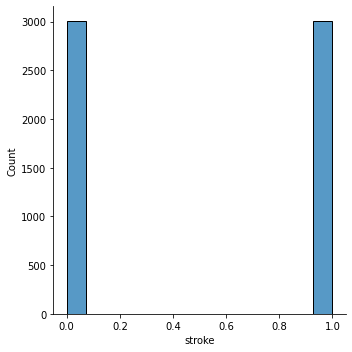

In [24]:
sns.displot(y_train_enS)

In [ ]:
smote_ord=SMOTE()
X_train_ordS, y_train_ordS = smote_ord.fit_resample(X_train_ord, y_train)
X_train_ordS.shape, y_train_ordS.shape

((6012, 10), (6012,))

###3.4 다양한 모델과 validation set으로 측정

####3.4.1 로지스틱 회귀모델로 확인하기

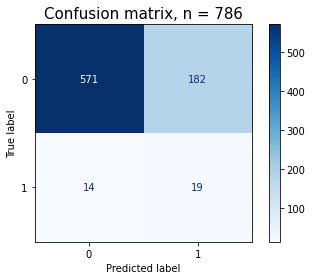

In [ ]:
model_logi = LogisticRegression(random_state=2)
model_logi.fit(X_train_enS, y_train_enS)
y_predL = model_logi.predict(X_val_en)

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model_logi, X_val_en, y_val,cmap=plt.cm.Blues,ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_val, y_predL))
score(y_val,y_predL)

              precision    recall  f1-score   support

           0       0.98      0.76      0.85       753
           1       0.09      0.58      0.16        33

    accuracy                           0.75       786
   macro avg       0.54      0.67      0.51       786
weighted avg       0.94      0.75      0.82       786



####3.4.2 의사결정나무 모델

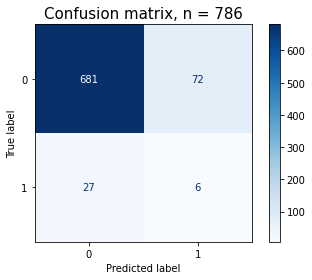

In [ ]:
model_tree=DecisionTreeClassifier(random_state=2)
model_tree.fit(X_train_ordS, y_train_ordS)
y_predT = model_tree.predict(X_val_ord)

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model_tree, X_val_ord, y_val,cmap=plt.cm.Blues,ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_val, y_predT))
score(y_val,y_predT)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       753
           1       0.08      0.18      0.11        33

    accuracy                           0.87       786
   macro avg       0.52      0.54      0.52       786
weighted avg       0.92      0.87      0.90       786



####3.4.3 랜덤포레스트 모델


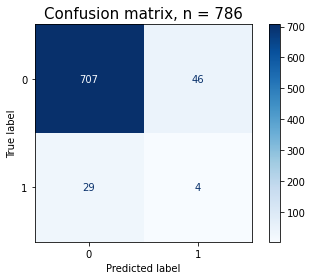

In [ ]:
model_forest=RandomForestClassifier(random_state=2)
model_forest.fit(X_train_ordS, y_train_ordS)
y_predF = model_forest.predict(X_val_ord)

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model_forest, X_val_ord, y_val, cmap=plt.cm.Blues, ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_val, y_predF))
score(y_val,y_predF)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       753
           1       0.08      0.12      0.10        33

    accuracy                           0.90       786
   macro avg       0.52      0.53      0.52       786
weighted avg       0.92      0.90      0.91       786



####3.4.4 XGBoost 모델

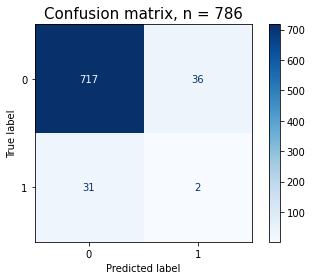

In [ ]:
model_XG=XGBClassifier(n_estimators=200, random_state=2,n_jobs=-1,learning_rate=0.2)

model_XG.fit(X_train_ordS, y_train_ordS)
y_predX = model_XG.predict(X_val_ord)

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model_XG, X_val_ord, y_val, cmap=plt.cm.Blues, ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_val, y_predX))
score(y_val,y_predX)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       753
           1       0.05      0.06      0.06        33

    accuracy                           0.91       786
   macro avg       0.51      0.51      0.51       786
weighted avg       0.92      0.91      0.92       786



####3.4.5 LGBoost 모델

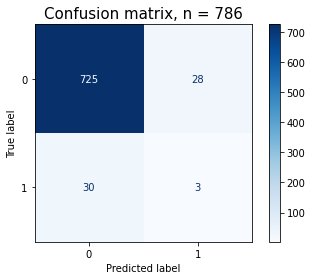

In [ ]:
model_LG=LGBMClassifier()
model_LG.fit(X_train_ordS,y_train_ordS)
y_predLG = model_LG.predict(X_val_ord)

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model_LG, X_val_ord, y_val, cmap=plt.cm.Blues, ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_val, y_predLG))
score(y_val,y_predLG)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       753
           1       0.10      0.09      0.09        33

    accuracy                           0.93       786
   macro avg       0.53      0.53      0.53       786
weighted avg       0.92      0.93      0.93       786

정확도 : 0.93, 정밀도 : 0.10, 재현율 : 0.09
f1-score : 0.09, auc : 0.53


의료데이터이다 보니 여러 평가지표 중 재현율(recall)에 초점을 맞추었다.

재현율이 높아야 실제 병이 있을 때 진단을 병이라고 내려준다.

###3.5 하이퍼파라미터 튜닝

In [ ]:
#랜더마이즈서치를 통한 하이퍼 파라미터 튜닝
model = Pipeline([
        ('One-Hot',OneHotEncoder(use_cat_names=True)),
        ('Scaler', MinMaxScaler()),
        ('sampling', SMOTE()),
        ('classification', LogisticRegression())
    ])

dists = {
    'classification__penalty': ['l1','l2','elasticnet','none'],
    'classification__C': [0.01, 0.1, 1,10]
}

clf = RandomizedSearchCV(
    estimator=model,
    param_distributions=dists, 
    n_iter=50, 
    cv=3,
    scoring='recall',
    verbose= 5,
    n_jobs=-1
    )

clf.fit(X_train, y_train);

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('score: ', -clf.best_score_)

최적 하이퍼파라미터:  {'classification__penalty': 'l2', 'classification__C': 0.01}
score:  -0.7833333333333333


###3.6 Final model

In [ ]:
model = Pipeline([
        ('One-Hot',OneHotEncoder(use_cat_names=True)),
        ('Scaler', MinMaxScaler()),
        ('sampling', SMOTE()),
        ('classification', LogisticRegression(penalty='l2',C=0.1))
    ])
model.fit(X_train,y_train)

Pipeline(steps=[('One-Hot',
                 OneHotEncoder(cols=['gender', 'ever_married', 'work_type',
                                     'Residence_type', 'smoking_status'],
                               use_cat_names=True)),
                ('Scaler', MinMaxScaler()), ('sampling', SMOTE()),
                ('classification', LogisticRegression(C=0.1))])

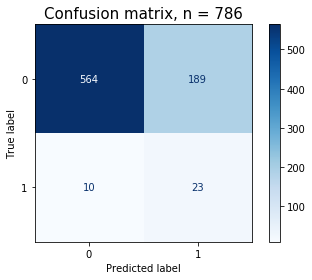

In [ ]:
y_predFinal = model.predict(X_val)

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model, X_val, y_val, cmap=plt.cm.Blues, ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_val, y_predFinal))
score(y_val,y_predFinal)

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       753
           1       0.11      0.70      0.19        33

    accuracy                           0.75       786
   macro avg       0.55      0.72      0.52       786
weighted avg       0.95      0.75      0.82       786

정확도 : 0.75, 정밀도 : 0.11, 재현율 : 0.70
f1-score : 0.19, auc : 0.72


###3.7 Test set을  통한 일반화 검증

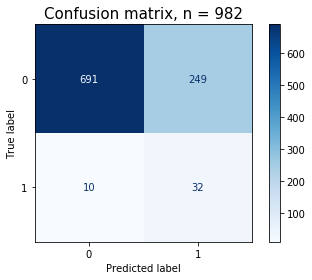

In [ ]:
y_predFinalTest = model.predict(X_test)
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_test, y_predFinalTest))
score(y_test,y_predFinalTest)

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       940
           1       0.11      0.76      0.20        42

    accuracy                           0.73       982
   macro avg       0.55      0.75      0.52       982
weighted avg       0.95      0.73      0.81       982

정확도 : 0.73, 정밀도 : 0.11, 재현율 : 0.76
f1-score : 0.20, auc : 0.75


베이스라인 모델에 비해 훨씬 recall값이 상승한 것을 알 수 있다.

모델 성능 개선을 위해 oversampling을 사용하여 학습데이터량을 증가시켰다. 

베이스라인조차 0값으로 95퍼센트 쏠려있는 imbalance 데이터다 보니 monor값에 대한 oversampling이 필요하였습니다.

다양한 모델을 시도해본 결과, Tree계열 모델보다 로지스틱회귀모델이 성능이 좋았고, 하이퍼파라미터 튜닝을 통해 recall값이 상승한 것을 볼 수 있습니다.

#4. 데이터분석 결과해석

목표


1.   어떤 특성이 가장 큰 영향을 미치는가
2.   나이별 발현율은 어떤가
3.   심장병과 고혈압은 뇌졸증의 원인에 영향을 미치는가
4.   흡연의 여부는 뇌졸증의 원인에 영향을 미치는가





###4.1 가장 큰 영향을 미치는 특성

####4.1.1 Feature Importances(Mean decrease impurity, MDI)

In [ ]:
#회귀계수를 통한 특성 중요도
logi = model.named_steps['classification']
onehot= (model.named_steps['One-Hot'].fit_transform(X_train)).columns

importance= pd.DataFrame(logi.coef_, columns=list(onehot.values));
importance.T.sort_values(by=0,ascending=False)


,0
age,5.479006
hypertension,1.008604
avg_glucose_level,0.894457
heart_disease,0.705394
work_type_Private,0.464076
smoking_status_smokes,0.398741
smoking_status_never smoked,0.104769
gender_Female,0.085832
ever_married_Yes,0.063635
work_type_Self-employed,0.059652


####4.1.2 PermutationImportance

In [ ]:
# permuter 정의
permuter = PermutationImportance(
    model.named_steps['classification'], # model
    scoring='recall', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed=model.named_steps['One-Hot'].transform(X_val)
X_val_transformed=model.named_steps['Scaler'].transform(X_val_transformed)

      

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed2, y_val);

In [ ]:
feature_names = list(onehot.values)
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

age                               3.636364e-01
hypertension                      1.030303e-01
ever_married_Yes                  1.818182e-02
ever_married_No                   1.212121e-02
avg_glucose_level                 6.060606e-03
work_type_children                6.060606e-03
smoking_status_Unknown            4.440892e-17
bmi                               0.000000e+00
Residence_type_Rural              0.000000e+00
Residence_type_Urban              0.000000e+00
work_type_Never_worked            0.000000e+00
work_type_Govt_job                0.000000e+00
smoking_status_formerly smoked    0.000000e+00
heart_disease                     0.000000e+00
smoking_status_never smoked      -6.060606e-03
work_type_Self-employed          -6.060606e-03
smoking_status_smokes            -1.818182e-02
work_type_Private                -2.424242e-02
gender_Female                    -3.030303e-02
gender_Male                      -3.030303e-02
dtype: float64

In [ ]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.3636 ± 0.1014,age
0.1030 ± 0.0485,hypertension
0.0182 ± 0.0297,ever_married_Yes
0.0121 ± 0.0297,ever_married_No
0.0061 ± 0.0242,avg_glucose_level
0.0061 ± 0.0242,work_type_children
0.0000 ± 0.0542,smoking_status_Unknown
0 ± 0.0000,bmi
0 ± 0.0000,Residence_type_Rural
0 ± 0.0000,Residence_type_Urban


In [ ]:
#원본 데이터 상관관계분석 -> 숫자형만 보임
stroke_data.corr()['stroke']

age                  0.232313
hypertension         0.142503
heart_disease        0.137929
avg_glucose_level    0.138984
bmi                  0.042341
stroke               1.000000
Name: stroke, dtype: float64

세가지 방법을 통해 공통적으로 눈에 띄는 특성은 <strong>나이와 고혈압, 혈당수치, 심장병 여부</strong>를 볼수 있겠습니다. 

###4.2 나이는 뇌졸증발생의 어떤 영향을 미치는가

In [ ]:
X_val_encoded=pd.DataFrame(X_val_transformed,columns=list(onehot))

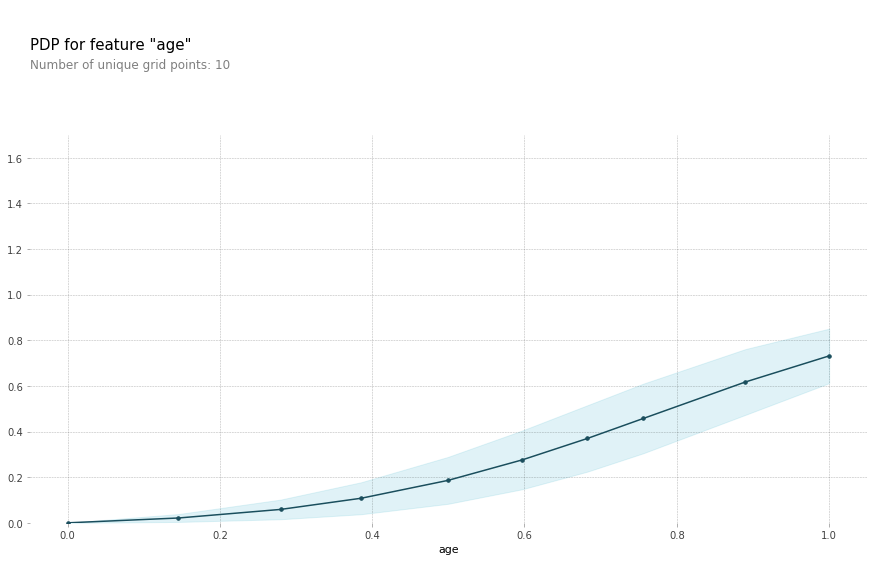

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'age'
isolated = pdp_isolate(
    model=logi, 
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

###4.3 심장병과 고혈압은 뇌졸증의 원인에 영향을 미치는가

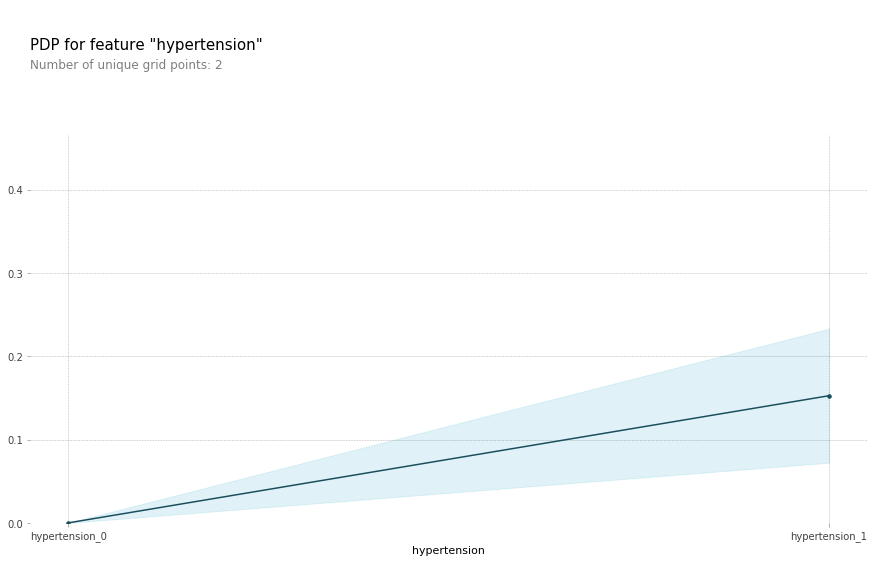

In [ ]:
feature = 'hypertension'
isolated = pdp_isolate(
    model=logi, 
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

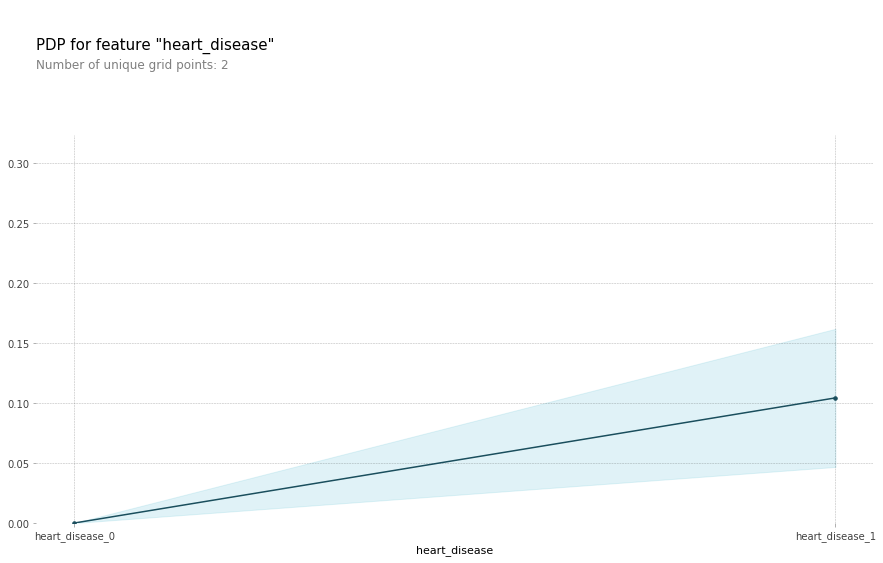

In [ ]:
feature = 'heart_disease'
isolated = pdp_isolate(
    model=logi, 
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

###4.4 흡연의 여부는 뇌졸증의 원인에 영향을 미치는가

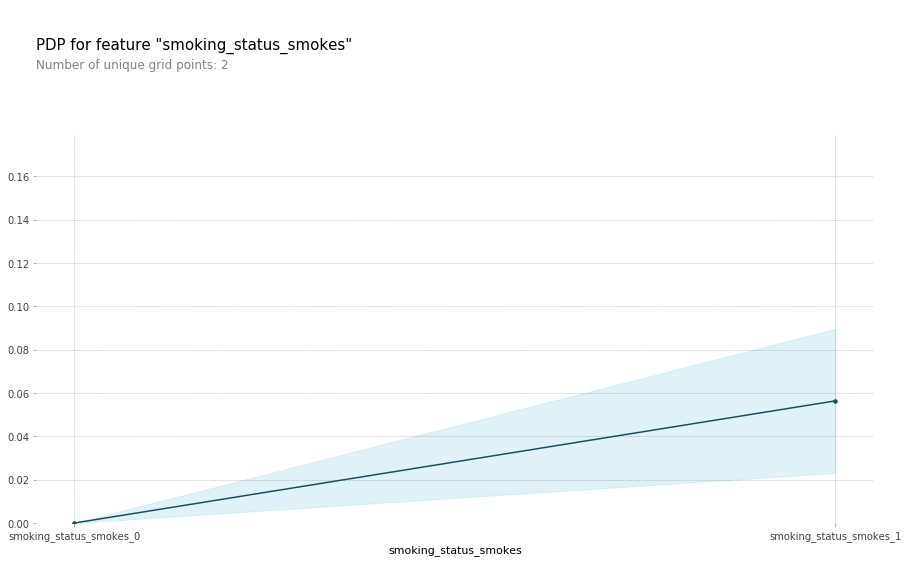

In [ ]:
feature = 'smoking_status_smokes'
isolated = pdp_isolate(
    model=logi, 
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

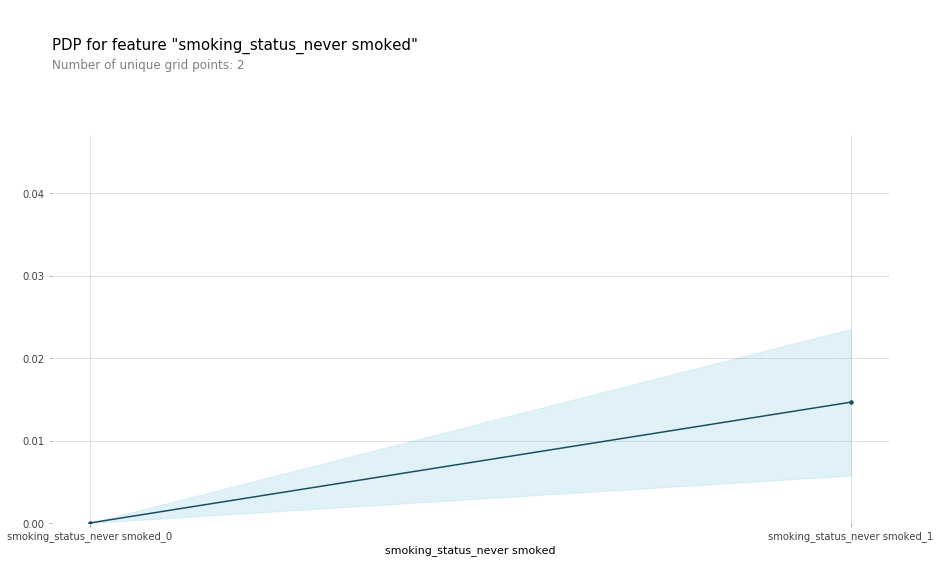

In [ ]:
feature = 'smoking_status_never smoked'
isolated = pdp_isolate(
    model=logi, 
    dataset=X_val_encoded,
    model_features=X_val_encoded.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);